<a href="https://colab.research.google.com/github/AldaCL/fast_fourier_transform/blob/main/app/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discrete Fourier Transform: Algorithm analiysis



In [29]:
#General imports
import time

# specific modules import
import numpy as np
import matplotlib.pyplot as plt

# Local modules import (self developed)
from core import dft, fft



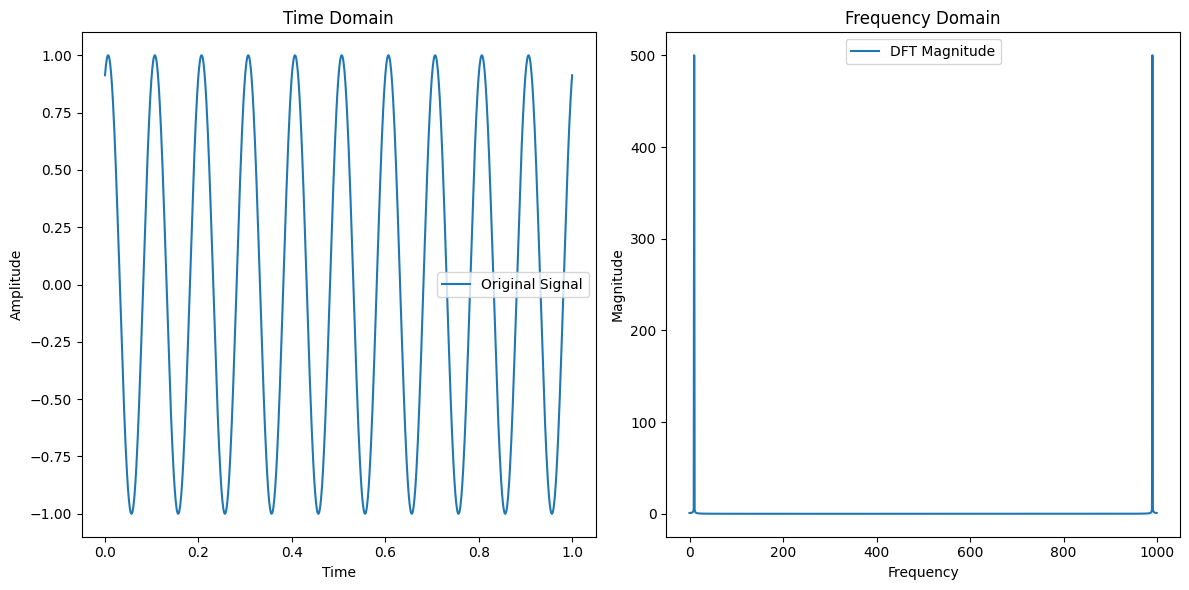

In [30]:
# Lets compare a sin wave with a sin wave with a phase shift with its DFT
# Lets define the parameters of the signal
dft_times = []
sampling_frequency = 1000
signal_frequency = 10
signal_phase = 20
signal_amplitude = 1
signal_length = 1
# Lets generate the signal
time_vector = np.linspace(0, signal_length, sampling_frequency*signal_length)
signal = signal_amplitude*np.sin(2*np.pi*signal_frequency*time_vector + signal_phase)

# Lets compute the DFT
time_start = time.time()
dft_result = dft.compute_dft_direct(input_signal=signal)
example_2_dft = time.time() - time_start
dft_times.append(example_2_dft)
# Lets plot the signal and its DFT
dft.plot_signal_and_dft(signal=signal, dft_result=dft_result)




# A more complex example:

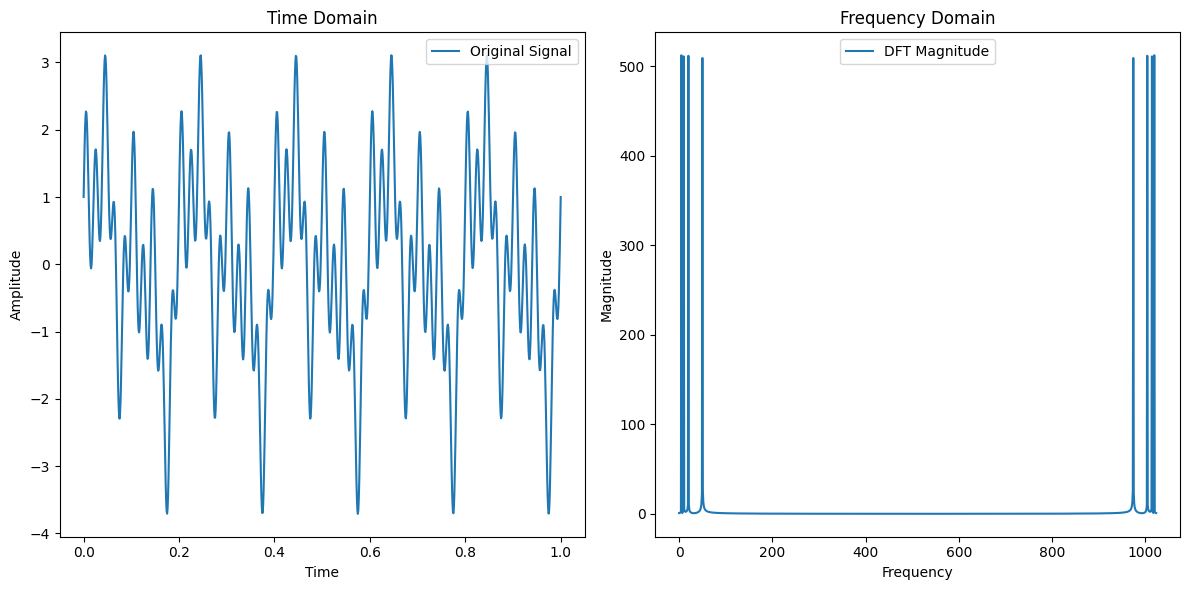

In [31]:
# First will generate an "random signal" with a given number of samples and a given max frequency:
number_of_samples = 1024
max_frequency = 100

signal_sample = dft.generate_signal(num_points=1024)

start_time = time.time()
signal_dft= dft.compute_dft_direct(input_signal=signal_sample)
example_3_dft = time.time() - start_time
dft_times.append(example_3_dft)

dft.plot_signal_and_dft(signal=signal_sample, dft_result=signal_dft)


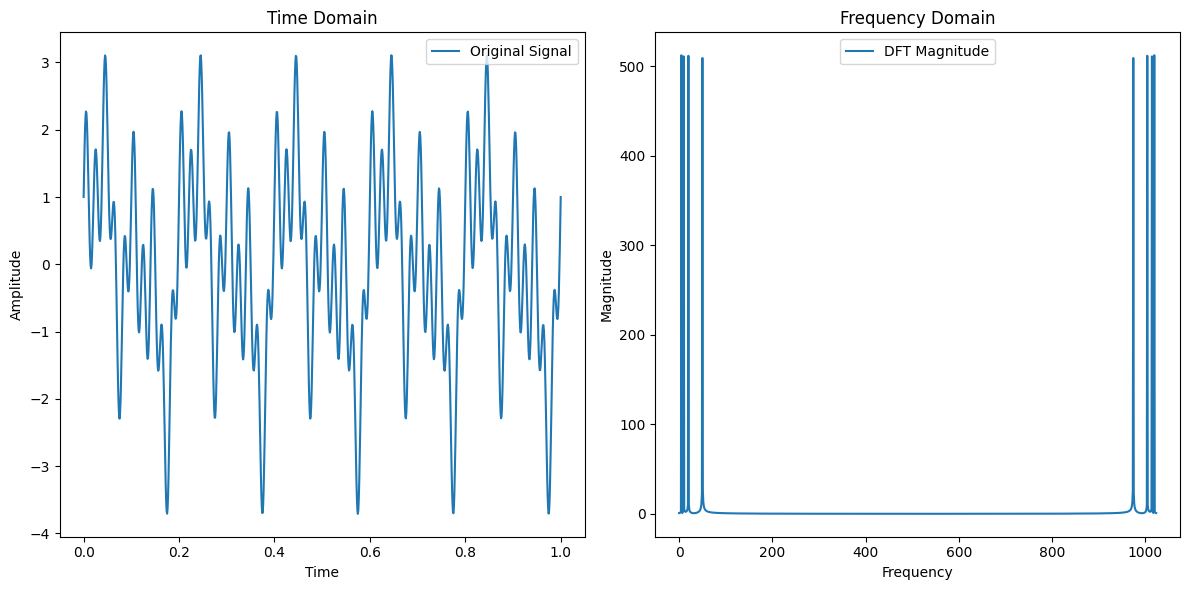

In [32]:
numpy_fft = np.fft.fft(signal_sample)
dft.plot_signal_and_dft(signal=signal_sample, dft_result=numpy_fft)

# Now let's add more randomness: Music 🎶


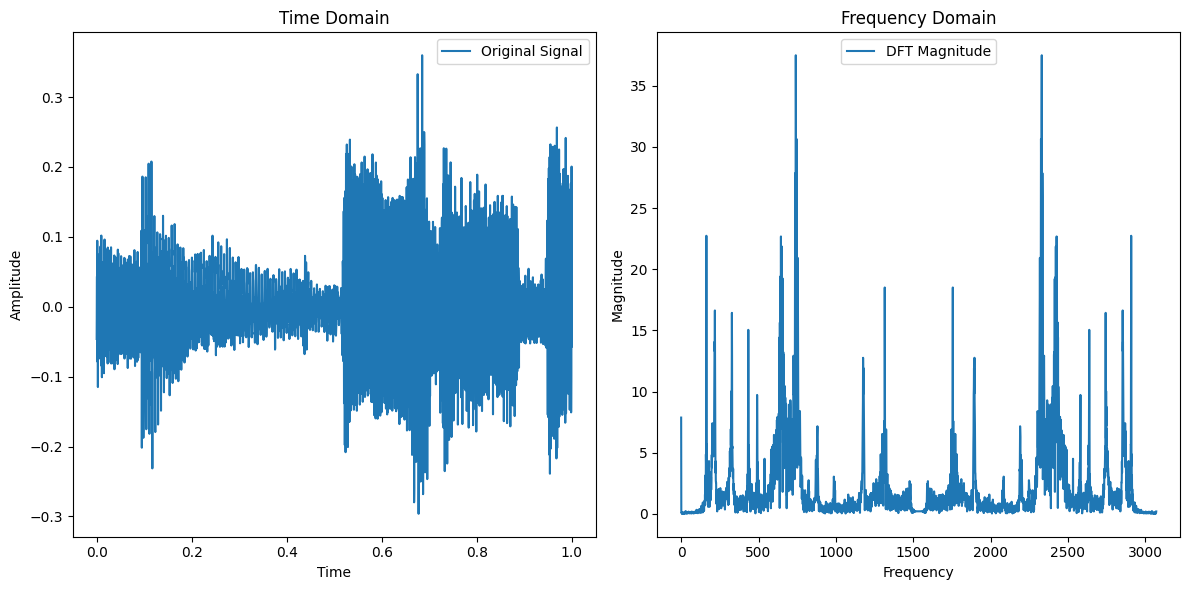

Time of execution:  22.815909147262573  seconds


In [33]:
import librosa

audio, sr = librosa.load('./utils/song2.mp3', sr=1024, mono =True, offset=10, duration = 3)  #Only to load the audio file


# Measure time of ejecution:
time_start = time.time()
dft_result = dft.compute_dft_direct(input_signal=audio)
time_end = time.time() - time_start
dft_times.append(time_end)
dft.plot_signal_and_dft(signal=audio, dft_result=dft_result)
print("Time of execution: ", time_end, " seconds")

# Fast Fourier Transform: Cooley-Tukey Algorithm analiysis



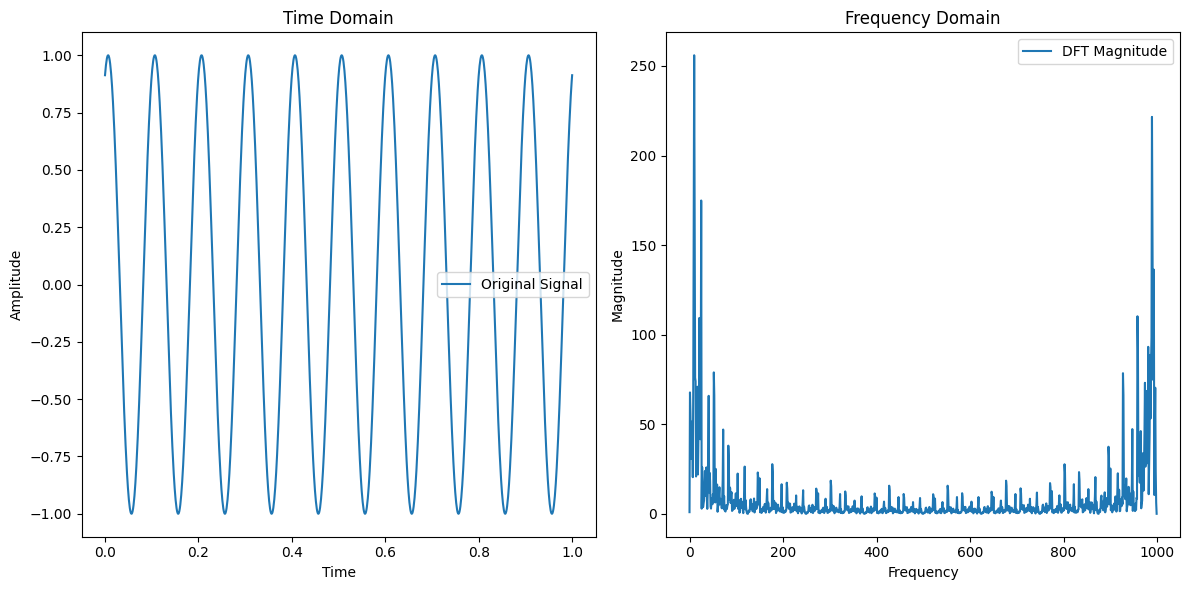

In [34]:
# Lets compare a sin wave with a sin wave with a phase shift with its DFT
# Lets define the parameters of the signal
fft_times = []
sampling_frequency = 1000
signal_frequency = 10
signal_phase = 20
signal_amplitude = 1
signal_length = 1
# Lets generate the signal
time_vector = np.linspace(0, signal_length, sampling_frequency*signal_length)
signal = signal_amplitude*np.sin(2*np.pi*signal_frequency*time_vector + signal_phase)

# Lets compute the DFT
time_start = time.time()
dft_result = fft.fft_cooley_tukey(signal=signal)
time_end = time.time() - time_start
fft_times.append(time_end)
# Lets plot the signal and its DFT
dft.plot_signal_and_dft(signal=signal, dft_result=dft_result)


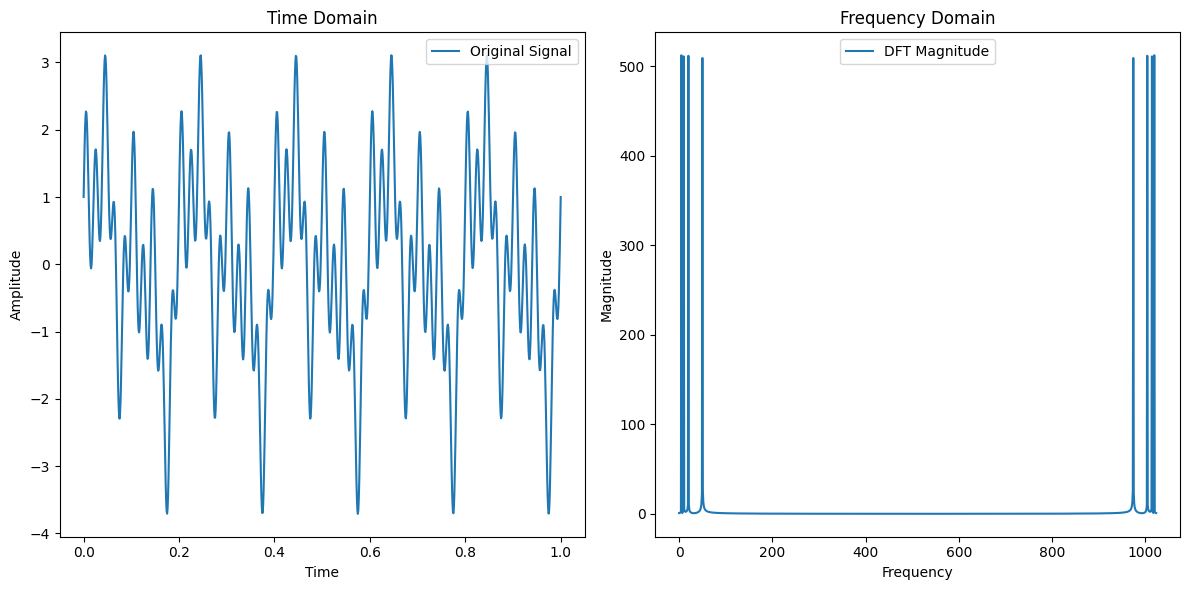

In [35]:
# First will generate an "random signal" with a given number of samples and a given max frequency:
number_of_samples = 1024
max_frequency = 100

signal_sample = dft.generate_signal(num_points=1024)
time_start = time.time()
signal_dft= fft.fft_cooley_tukey(signal=signal_sample)
time_end = time.time() - time_start
fft_times.append(time_end)
dft.plot_signal_and_dft(signal=signal_sample, dft_result=signal_dft)


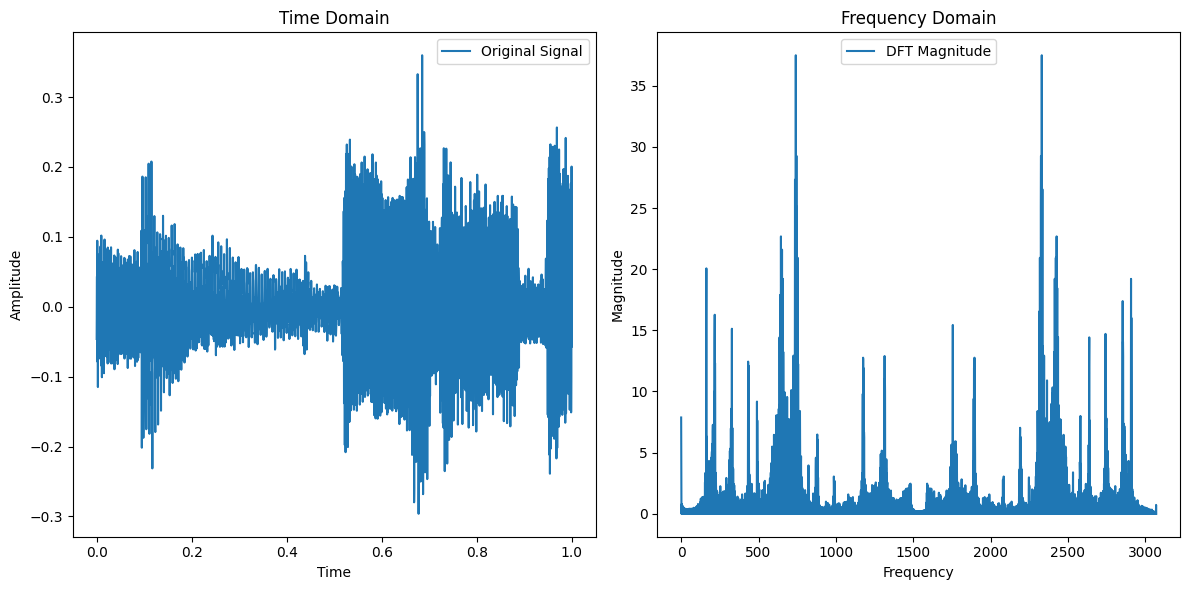

Time of execution:  0.05824422836303711  seconds


In [36]:
# Lets repeat the same tests with aour implementation of the FFT:
from core import fft

time_start = time.time()
fft_result = fft.fft_cooley_tukey(signal=audio)
time_end = time.time() - time_start
fft_times.append(time_end)
dft.plot_signal_and_dft(signal=audio, dft_result=fft_result)
print("Time of execution: ", time_end, " seconds")

# Compairson between DFT (direct evaluation) vs FFT


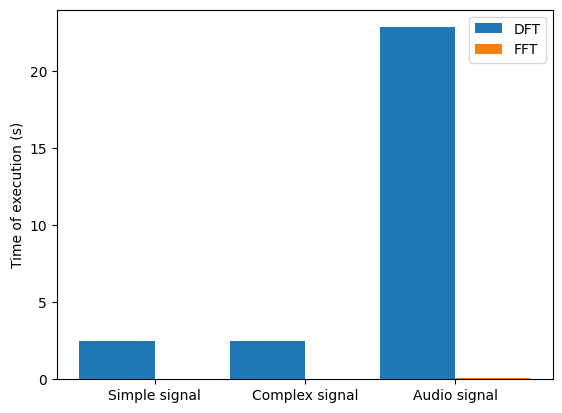

In [42]:
# Compare 2 arrays of times as bar plots:
dft_times = np.array(dft_times)
fft_times = np.array(fft_times)
plt.figure()
plt.bar(x=[1,2,3], height=dft_times, width=0.5, label="DFT")
plt.bar(x=[1.5,2.5,3.5], height=fft_times, width=0.5, label="FFT")  
plt.xticks([1.25,2.25,3.25], labels=["Simple signal", "Complex signal", "Audio signal"])
plt.ylabel("Time of execution (s)")
plt.legend()



In [38]:
fft_times


array([0.01555204, 0.01688695, 0.05824423])

In [39]:
dft_times


array([ 2.50034523,  2.45165324, 22.81590915])

In [40]:
def compare_dft_fft_performance(signal_lengths):
    performance_results = {
        "length": [],
        "dft_time": [],
        "fft_time": []
    }

    for length in signal_lengths:
        signal = np.random.random(length)

        start_time = time.time()
        _ = dft.compute_dft_direct(signal)
        dft_time = time.time() - start_time

        start_time = time.time()
        _ = fft.fft_cooley_tukey(signal)
        fft_time = time.time() - start_time

        performance_results["length"].append(length)
        performance_results["dft_time"].append(dft_time)
        performance_results["fft_time"].append(fft_time)

    return performance_results


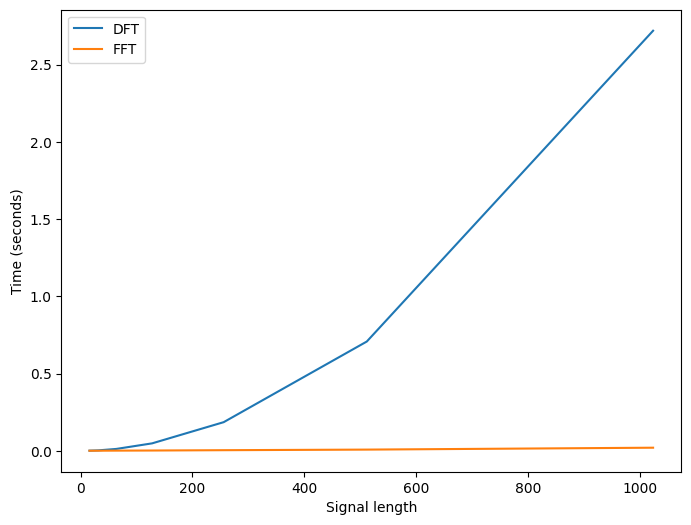

In [41]:
#Lets compare the time of execution for multiple signals:

signal_lengths = [16, 32, 64, 128, 256, 512, 1024]  # Limited to smaller sizes due to DFT's O(n^2) complexity, thats why we dont use music files
signals_examples = compare_dft_fft_performance(signal_lengths=signal_lengths)

# Plot the results:
plt.figure(figsize=(8, 6))
plt.plot(signals_examples["length"], signals_examples["dft_time"], label="DFT")
plt.plot(signals_examples["length"], signals_examples["fft_time"], label="FFT")
plt.xlabel("Signal length")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()


